In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

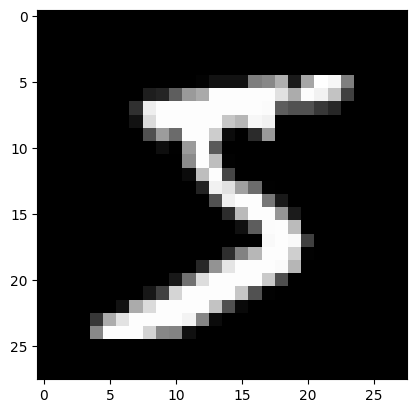

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape


(60000, 10)

PREETHA S, 212222230110


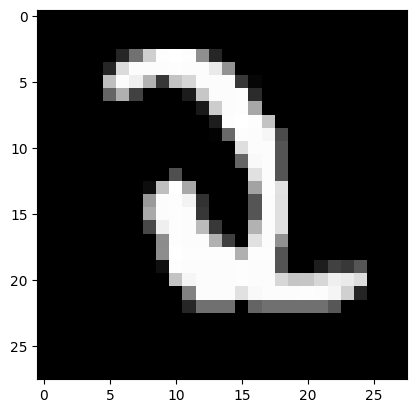

In [ ]:
print("PREETHA S, 212222230110")
single_image = X_train[400]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,170 (688.16 KB)

 Trainable params: 176,170 (688.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.8551 - loss: 0.5180 - val_accuracy: 0.9712 - val_loss: 0.0938
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 29ms/step - accuracy: 0.9734 - loss: 0.0880 - val_accuracy: 0.9774 - val_loss: 0.0664
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9836 - loss: 0.0533 - val_accuracy: 0.9827 - val_loss: 0.0524
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9872 - loss: 0.0421 - val_accuracy: 0.9845 - val_loss: 0.0484
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.9907 - loss: 0.0318 - val_accuracy: 0.9837 - val_loss: 0.0513


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
print("Preetha S, 212222230110")
metrics.head()

Preetha S, 212222230110


,accuracy,loss,val_accuracy,val_loss
0,0.925783,0.258775,0.9712,0.093844
1,0.975400,0.079812,0.9774,0.066365
2,0.983083,0.054833,0.9827,0.052391
3,0.987283,0.041971,0.9845,0.048444
4,0.990367,0.033226,0.9837,0.051276


Preetha S, 212222230110


<Axes: >

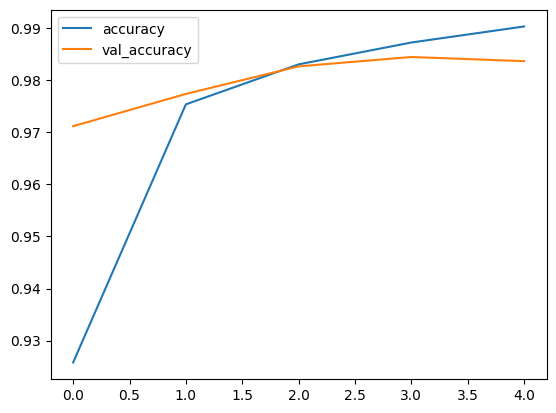

In [ ]:
print("Preetha S, 212222230110")
metrics[['accuracy','val_accuracy']].plot()

Preetha S, 212222230110


<Axes: >

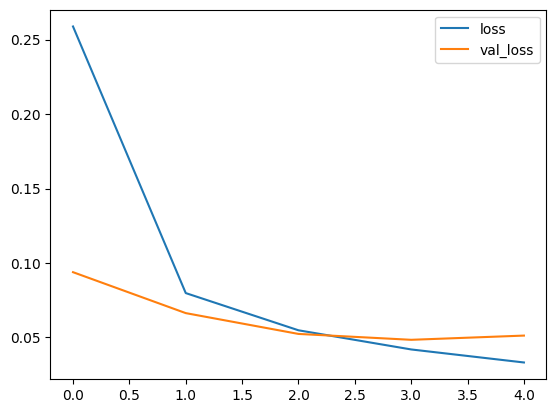

In [ ]:
print("Preetha S, 212222230110")
metrics[['loss','val_loss']].plot()

In [ ]:
print("Preetha S, 212222230110")
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

Preetha S, 212222230110
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
print("Preetha S, 212222230110")
print(classification_report(y_test,x_test_predictions))

Preetha S, 212222230110
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:

print(confusion_matrix(y_test,x_test_predictions))

[[ 974    0    1    0    0    2    2    0    0    1]
 [   0 1127    1    2    0    0    2    1    2    0]
 [   2    1 1004    6    1    0    0   11    6    1]
 [   0    0    0 1002    0    4    0    2    2    0]
 [   2    0    3    0  962    0    0    1    1   13]
 [   0    0    0    7    0  884    1    0    0    0]
 [   4    2    0    1    2   14  932    0    3    0]
 [   0    1    4    2    0    1    0 1017    1    2]
 [   2    0    0    6    1    4    1    2  952    6]
 [   0    0    0    5    7    4    0    7    3  983]]


In [ ]:
img = image.load_img('mnist.jpg')

In [ ]:
type(img)

img = image.load_img('mnist.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[8]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
PREETHA S
[6]


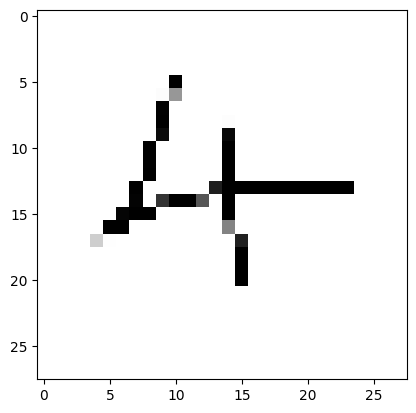

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

print(x_single_prediction)

plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

print('PREETHA S')
print(x_single_prediction)